<div class="alert alert-block alert-success">
    
# FIT5196 Task 3 in Assessment 1
#### Student Name: Manh Tung Vu, Ilya Bessonov
#### Student ID: 30531438, 34466029

Date: 28/08/2024


Environment: Python 3

Libraries used:
* pandas
* json
* re
* os
* numpy
* matplotlib
* seaborn
* sklearn
* datetime
* scipy.stats
    
</div>

<div class="alert alert-block alert-warning">

## 1.  Introduction  <a class="anchor" name="Intro"></a>
    
</div>
The aim of this notebook is to perform a comprehensive Exploratory Data Analysis (EDA) on the provided Google Review dataset. The goal is to uncover meaningful insights that can inform further analysis and support decision-making processes. This analysis will focus on identifying trends, patterns, and anomalies within the data to enhance our understanding of business reviews on Google Maps.

**Dataset Overview**

The dataset consists of Google Reviews data, which includes key features and variables relevant to customer feedback. We will begin by reviewing and summarizing these features to identify initial patterns and trends. Additionally, there is an optional auxiliary metadata dataset that may provide further context and enhance our analysis.

**Methodology**

1.	Understanding the Sample Data:
  * Summarize key features and variables.
  * Identify initial patterns, trends, and relationships within the main dataset.
2.	Evaluating Auxiliary Metadata:
  * Summarize key features and variables of the metadata.
  * Assess the relevance and usefulness of the auxiliary metadata.
  * Decide whether to incorporate metadata into the primary analysis.
  * Enrich the main dataset by relevant metadata.
3.	Data Analysis:
  * Perform exploratory data analysis using the main dataset and metadata.
  * Investigate 5 interesting insights supported by visualizations and/or statistical summaries.
  * Create meaningful conclusions from in-depth analysis and the found insights.

We use:
* statistical summaries
* cross-tabulation
* correlation analysis
* statistical testing
* regression analysis
* clusterization
* visualization: histograms, scatterplots, boxplots and so on.

<div class="alert alert-block alert-warning">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>
 </div>

The packages to be used in this assessment are imported in the following. They are used to fulfill the following tasks:

* **re:** to define and use regular expressions
* **pandas:** for data manipulation and analysis
* **json:** to parse JSON data
* **os:** to interact with the operating system
* **numpy:** for numerical computing (we need only np.nan)
* **matplotlib.pyplot:** to create visualizations
* **seaborn:** for statistical data visualization
* **sklearn.cluster.KMeans:** algo for clustering data
* **datetime:** to manipulate dates and times
* **scipy.stats:** to do statistical functions and tests

In [1]:
import pandas as pd
import json
import re
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import datetime
from scipy import stats

<div class="alert alert-block alert-warning">

## 3. Examining Raw Data <a class="anchor" name="examine1"></a>

 </div>

## 3.1. Download data
Recover dataframe with reviews from outputjson file

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
directory_path = '/content/drive/MyDrive/FIT5196_assignment_files/'

Сhange the settings to improve the presentation of tables

In [4]:
pd.set_option('display.max_colwidth', 20)

In task 1 we have prepared file task1full.csv which contains all necessary information with review.

task1_xxxx.json and task1_xxxx.csv don't contain all information for analysis

In [5]:
df = pd.read_csv(directory_path+"task1full.csv", index_col=0)
print(f"The table contain {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

The table contain 37706 rows and 12 columns


,user_id,name,gmap_id,rating,time_ms,pics,text,resp,time,if_pic,if_response,pic_dim
0,1127197139207744...,Michael Tobin,0x80843e0cb60c8a...,5,1.620010e+12,NaN,easy to find. am...,NaN,2021-05-03 02:50:05,N,N,[]
1,1149013322618004...,Email1 Email1,0x80843e0cb60c8a...,4,1.606695e+12,[{'url': ['https...,very good hambur...,NaN,2020-11-30 00:16:27,Y,N,"[['150', '150'],..."
2,1130707628982658...,Morgan H.,0x80843e0cb60c8a...,5,1.614154e+12,NaN,everything one c...,NaN,2021-02-24 08:02:57,N,N,[]
3,1015862480710767...,S. S.,0x80843e0cb60c8a...,3,1.602696e+12,NaN,nothing makes it...,NaN,2020-10-14 17:28:31,N,N,[]
4,1076130788115548...,Julie Galvez,0x80843e0cb60c8a...,5,1.612058e+12,NaN,went to el nego ...,NaN,2021-01-31 01:54:26,N,N,[]


The table contain:
* **user_id**: identifier of user
* **name**: name of the user
* **gmap_id**: identifier of the place/business
* **rating**: rating in the review
* **time_ms**: time in milliseconds of the review (from 01/01/1970)
* **pics**: url links to the pictures
* **resp**: time and text of the response
* **time**: readable format of time
* **if_pic**: there are pictures in the review (Y/N)
* **if_response**: there is a response to the review (Y/N)
* **pic_dim**: dimensions of pictures

## 3.2. Create more features for analysis
For further analysis, transfrom categorical values into numerical using label encoding and one-hot encoding

1. Transfrom if_pic and if_response into 0 (N) and 1 (Y) values. Get **has_pics** and **has_response** column correspondingly
2. Calculate number of pictures (**num_of_pictures**)
3. Calculate the length of the review (**len_review_text**)
4. Extract time and text of response (**response_text**, **response_time_ms**)
5. Calculate the length of the response (**len_response_text**)
6. Transform time of the response into readable format (**response_time**)
7. Calculate number of days between review and response (**time_to_resp_days**)

In [6]:
# to extract time and text of response
def responses(response, field="time"):
  pattern_time = r"\{[\'\"]time[\'\"]\:\s*([0-9]+)\s*,\s*[\'\"]text[\'\"]\:"
  pattern_text = r"[\'\"]text[\'\"]\:\s*[\'\"](.*)[\'\"]\s*\}$"
  if field == "time":
    return int(re.findall(pattern_time, response)[0])
  else:
    return str(re.findall(pattern_text, response)[0])

# Create new features
df['has_pics'] = df['if_pic'].apply(lambda x: 1 if x == 'Y' else 0)
df['has_response'] = df['if_response'].apply(lambda x: 1 if x == 'Y' else 0)
df['num_of_pictures'] = df['pics'].apply(lambda x: len(re.findall(r"\{\'url\'\:", x)) if pd.notna(x) else 0)
df['text'] = df['text'].apply(lambda x: np.nan if x == 'None' or pd.isna(x) else str(x)) # It is more convenient to work with NaN then with 'None'
df['len_review_text'] = df['text'].apply(lambda x: len(x) if pd.notna(x) else np.nan)
df['response_text'] = df['resp'].apply(lambda x: responses(x, "text") if pd.notna(x) else np.nan)
df['response_time_ms'] = df['resp'].apply(lambda x: responses(x) if pd.notna(x) else np.nan)
df['len_response_text'] = df['response_text'].apply(lambda x: len(x) if pd.notna(x) else np.nan)
df['response_time'] = pd.to_datetime(df['response_time_ms'], unit='ms').dt.strftime('%Y-%m-%d %H:%M:%S')
df['time_to_resp_days'] = (pd.to_datetime(df['response_time_ms'], unit='ms') - pd.to_datetime(df['time_ms'], unit='ms')).dt.total_seconds()/60/60/24
df[61:70].head(3)

,user_id,name,gmap_id,rating,time_ms,pics,text,resp,time,if_pic,...,pic_dim,has_pics,has_response,num_of_pictures,len_review_text,response_text,response_time_ms,len_response_text,response_time,time_to_resp_days
61,1098336850318126...,Katie Freeman,0x80d95155e7a00a...,5,1.620699e+12,NaN,"seriously, this ...",{'time': 1621337...,2021-05-11 02:07:37,N,...,[],0,1,0,643.0,We love knowing ...,1.621337e+12,170.0,2021-05-18 11:30:11,7.390383
62,1103846331668355...,latinaluv21,0x80d95155e7a00a...,5,1.627002e+12,NaN,were very helpfu...,NaN,2021-07-23 00:55:16,N,...,[],0,0,0,160.0,NaN,NaN,NaN,NaN,NaN
63,1098289864894731...,Shane Mokou,0x80d95155e7a00a...,5,1.627079e+12,NaN,"best experience,...",NaN,2021-07-23 22:28:31,N,...,[],0,0,0,199.0,NaN,NaN,NaN,NaN,NaN


## 3.3 Description and summary of dataset

1. Show information about all created features in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37706 entries, 0 to 123
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            37706 non-null  object 
 1   name               37706 non-null  object 
 2   gmap_id            37706 non-null  object 
 3   rating             37706 non-null  int64  
 4   time_ms            37706 non-null  float64
 5   pics               1094 non-null   object 
 6   text               23149 non-null  object 
 7   resp               5687 non-null   object 
 8   time               37706 non-null  object 
 9   if_pic             37706 non-null  object 
 10  if_response        37706 non-null  object 
 11  pic_dim            37706 non-null  object 
 12  has_pics           37706 non-null  int64  
 13  has_response       37706 non-null  int64  
 14  num_of_pictures    37706 non-null  int64  
 15  len_review_text    23149 non-null  float64
 16  response_text      5687 non-n

We have
- 37706 review
- 23147 reviews contain text review
- 1094 contain pictures
- 5687 have responses

In [8]:
df.describe()

,rating,time_ms,has_pics,has_response,num_of_pictures,len_review_text,response_time_ms,len_response_text,time_to_resp_days
count,37706.000000,3.770600e+04,37706.000000,37706.000000,37706.000000,23149.000000,5.687000e+03,5687.000000,5687.000000
mean,4.401315,1.553279e+12,0.029014,0.150825,0.082905,153.156249,1.574467e+12,154.872165,18.836218
std,1.137600,4.842597e+10,0.167848,0.357883,0.845165,222.421480,3.794578e+10,143.459677,144.531946
min,1.000000,1.019520e+12,0.000000,0.000000,0.000000,1.000000,1.390847e+12,1.000000,-1222.679709
25%,4.000000,1.525194e+12,0.000000,0.000000,0.000000,36.000000,1.552686e+12,69.000000,0.164524
50%,5.000000,1.558999e+12,0.000000,0.000000,0.000000,81.000000,1.579551e+12,128.000000,1.053440
75%,5.000000,1.590724e+12,0.000000,0.000000,0.000000,182.000000,1.605309e+12,212.000000,7.013676
max,5.000000,1.629503e+12,1.000000,1.000000,50.000000,4088.000000,1.628802e+12,2635.000000,2835.745932


For some review the time between review and response is negative what is **impossible**. So we can not rely on this responses and delete them for further analysis (keep only 'resp' column just in case).

In [9]:
# look at the data with review after response
df_strange_resp = df[df['time_to_resp_days'] < 0]
print(f"The table contain {df_strange_resp.shape[0]} rows and {df_strange_resp.shape[1]} columns")
df_strange_resp.head(3)

The table contain 247 rows and 21 columns


,user_id,name,gmap_id,rating,time_ms,pics,text,resp,time,if_pic,...,pic_dim,has_pics,has_response,num_of_pictures,len_review_text,response_text,response_time_ms,len_response_text,response_time,time_to_resp_days
204,1062349174539093...,GfUNk T,0x80d95155e7a00a...,1,1.623560e+12,NaN,NaN,{'time': 1621337...,2021-06-13 04:49:26,N,...,[],0,1,0,NaN,We pride ourselv...,1.621337e+12,144.0,2021-05-18 11:28:57,-25.722094
561,1085321173684962...,mike hernandez,0x80dc9ded084a3d...,1,1.624937e+12,NaN,tried giving the...,{'time': 1592841...,2021-06-29 03:31:03,N,...,[],0,1,0,757.0,Thanks for the f...,1.592842e+12,895.0,2020-06-22 16:01:19,-371.478274
575,1068876416149901...,Richard Ward,0x80dc9ded084a3d...,5,1.572026e+12,NaN,great job on get...,{'time': 1559624...,2019-10-25 17:58:38,N,...,[],0,1,0,139.0,Thanks Richard w...,1.559624e+12,100.0,2019-06-04 04:58:34,-143.541516


The number of abnormal responses is only 247, so we can delete these responses from analysis

In [10]:
df.loc[df['time_to_resp_days'] < 0, ['has_response']] = 0
df.loc[df['time_to_resp_days'] < 0, ['if_response']] = 'N'
df.loc[df['time_to_resp_days'] < 0, ['response_text',	'response_time_ms',	'len_response_text',	'response_time',	'time_to_resp_days']] = np.nan
print(f"The table contain {df.shape[0]} rows and {df.shape[1]} columns")
df[204:210].head(3)

The table contain 37706 rows and 21 columns


,user_id,name,gmap_id,rating,time_ms,pics,text,resp,time,if_pic,...,pic_dim,has_pics,has_response,num_of_pictures,len_review_text,response_text,response_time_ms,len_response_text,response_time,time_to_resp_days
204,1062349174539093...,GfUNk T,0x80d95155e7a00a...,1,1.623560e+12,NaN,NaN,{'time': 1621337...,2021-06-13 04:49:26,N,...,[],0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
205,1158626748783803...,Jesus Samaniego,0x80d95155e7a00a...,5,1.614552e+12,NaN,NaN,{'time': 1618006...,2021-02-28 22:41:44,N,...,[],0,1,0,NaN,Thanks Jesus for...,1.618007e+12,34.0,2021-04-09 22:18:59,39.984416
206,1055456787127737...,Paul Savage,0x80d95155e7a00a...,5,1.628533e+12,NaN,NaN,NaN,2021-08-09 18:12:48,N,...,[],0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.describe()

,rating,time_ms,has_pics,has_response,num_of_pictures,len_review_text,response_time_ms,len_response_text,time_to_resp_days
count,37706.000000,3.770600e+04,37706.000000,37706.000000,37706.000000,23149.000000,5.440000e+03,5440.000000,5440.000000
mean,4.401315,1.553279e+12,0.029014,0.144274,0.082905,153.156249,1.574846e+12,152.172426,27.272253
std,1.137600,4.842597e+10,0.167848,0.351372,0.845165,222.421480,3.804089e+10,140.088650,133.268826
min,1.000000,1.019520e+12,0.000000,0.000000,0.000000,1.000000,1.390847e+12,1.000000,0.000418
25%,4.000000,1.525194e+12,0.000000,0.000000,0.000000,36.000000,1.553178e+12,68.000000,0.257565
50%,5.000000,1.558999e+12,0.000000,0.000000,0.000000,81.000000,1.580332e+12,125.000000,1.239871
75%,5.000000,1.590724e+12,0.000000,0.000000,0.000000,182.000000,1.605630e+12,209.000000,7.804583
max,5.000000,1.629503e+12,1.000000,1.000000,50.000000,4088.000000,1.628802e+12,2635.000000,2835.745932


We can find:
* More than half of the ratings - 5
* 3% of reviews contain photos, with an average of 0.08 photos per review.
* 14% of reviews have responses
* The length of review and response texts varies from 1 character to over 4,000 characters, with an average of about 150 characters
* The median response time to a review is slightly over 1 day (the average value is not very indicative here, as there are outliers)

Look deeper at categorial features

In [12]:
#create table with numbers of categorial observation in df
df_cat = pd.DataFrame(df.select_dtypes(include=['object']).nunique()).reset_index()
df_cat.columns = ['Column Name', 'Number of Unique Values']
df_cat

,Column Name,Number of Unique Values
0,user_id,37452
1,name,36473
2,gmap_id,176
3,pics,1094
4,text,22160
5,resp,5685
6,time,36821
7,if_pic,2
8,if_response,2
9,pic_dim,30


Look at the number of observations with/without pictures and with/without response

In [13]:
pic_resp_table = pd.crosstab(df['if_pic'], df['if_response'], margins=True, margins_name="Total")
pic_resp_table


if_response,N,Y,Total
if_pic,,,
N,31231,5381,36612
Y,1035,59,1094
Total,32266,5440,37706


Only small number of review has pictures and responses. The major part does not have

Look at the distribution of ratings, length of the texts and time to response

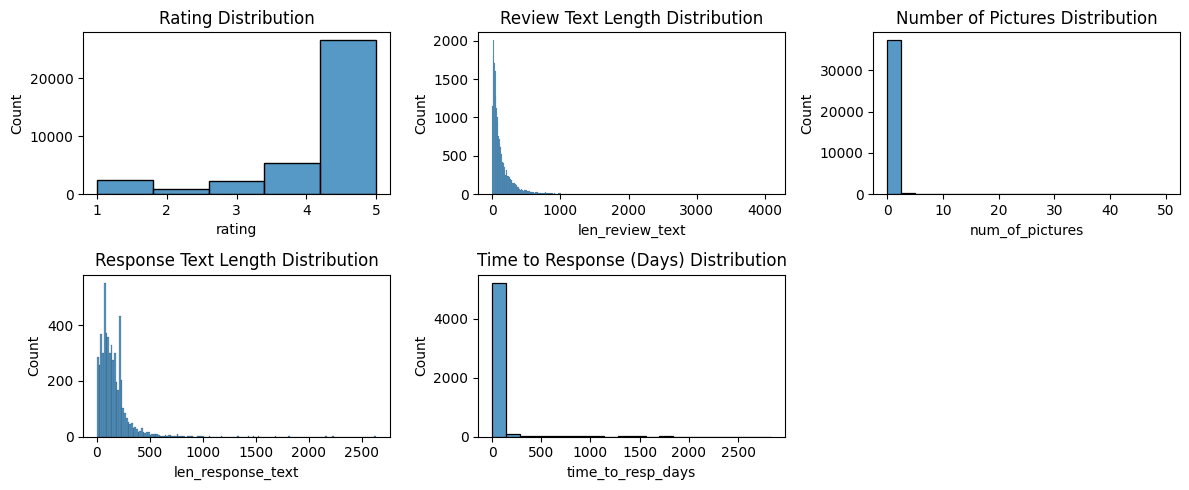

In [14]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 5))

# Plot histograms
sns.histplot(df['rating'], bins=5, ax=axes[0, 0])
axes[0, 0].set_title('Rating Distribution')

sns.histplot(df['len_review_text'].dropna(), ax=axes[0, 1])
axes[0, 1].set_title('Review Text Length Distribution')

sns.histplot(df['num_of_pictures'].dropna(), bins=20, ax=axes[0, 2])
axes[0, 2].set_title('Number of Pictures Distribution')

sns.histplot(df['len_response_text'].dropna(), ax=axes[1, 0])
axes[1, 0].set_title('Response Text Length Distribution')

sns.histplot(df['time_to_resp_days'].dropna(), bins=20, ax=axes[1, 1])
axes[1, 1].set_title('Time to Response (Days) Distribution')

# Adjust layout
fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()


Calculate statistics for rating, text length, response lenght, and time to response

In [15]:
df[['len_review_text', 'len_response_text', 'time_to_resp_days', 'num_of_pictures']].describe()

,len_review_text,len_response_text,time_to_resp_days,num_of_pictures
count,23149.000000,5440.000000,5440.000000,37706.000000
mean,153.156249,152.172426,27.272253,0.082905
std,222.421480,140.088650,133.268826,0.845165
min,1.000000,1.000000,0.000418,0.000000
25%,36.000000,68.000000,0.257565,0.000000
50%,81.000000,125.000000,1.239871,0.000000
75%,182.000000,209.000000,7.804583,0.000000
max,4088.000000,2635.000000,2835.745932,50.000000


In [16]:
# Calculate skewness and kurtosis
stats_df = pd.DataFrame({
    'Feature': ['Rating', 'Text Length', 'Response Length', 'Number of pictures', 'Time to Response (Days)'],
    'Skewness': [stats.skew(df['rating']),
                 stats.skew(df['len_review_text'].dropna()),
                 stats.skew(df['len_response_text'].dropna()),
                 stats.skew(df['num_of_pictures'].dropna()),
                 stats.skew(df['time_to_resp_days'].dropna())],
    'Kurtosis': [stats.kurtosis(df['rating']),
                 stats.kurtosis(df['len_review_text'].dropna()),
                 stats.kurtosis(df['len_response_text'].dropna()),
                 stats.kurtosis(df['num_of_pictures'].dropna()),
                 stats.kurtosis(df['time_to_resp_days'].dropna())]
})

stats_df.head()

,Feature,Skewness,Kurtosis
0,Rating,-2.003178,2.942256
1,Text Length,5.162932,48.638983
2,Response Length,4.731216,50.285929
3,Number of pictures,24.683601,913.043848
4,Time to Response...,10.257852,132.279417


We see that the distributions of text length, response time, and number of photos are asymmetric and likely have outliers.

## 3.4 Trends

In [17]:
dtmin = datetime.datetime.fromtimestamp(df['time_ms'].min() // 1000).strftime("%Y-%m-%d %H:%M:%S")
dtmax = datetime.datetime.fromtimestamp(df['time_ms'].max() // 1000).strftime("%Y-%m-%d %H:%M:%S")

print(f"Earliest review in data set: {dtmin}")
print(f"Latest review in data set: {dtmax}")


Earliest review in data set: 2002-04-23 00:00:00
Latest review in data set: 2021-08-20 23:38:10


The dataset contains reviews from Apr 2002 to Aug 2021

To analyse trend extract the year of the review

In [18]:
df["Year"] = df["time"].apply(lambda x: int(x[:4]))

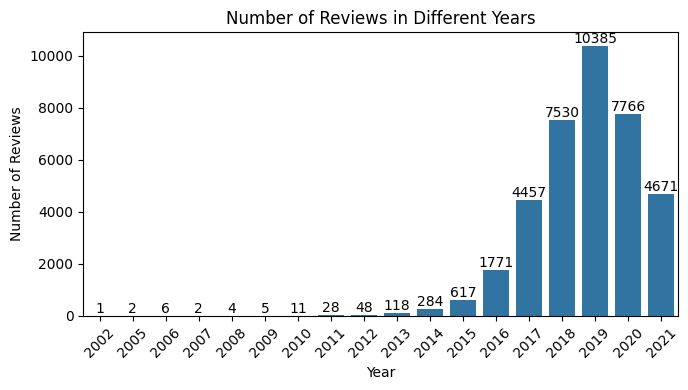

In [19]:
# plot with numbers of review in different years

df_year = df.groupby("Year")["rating"].count().reset_index()
plt.figure(figsize=(7, 4))
ax = sns.barplot(x='Year', y='rating', data=df_year)
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews in Different Years')
plt.xticks(rotation=45)
plt.tight_layout()

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.show()


We can see that the number of reviews increases till 2019, then starts decreasing, which can be explained by pandemic in 2020-2021

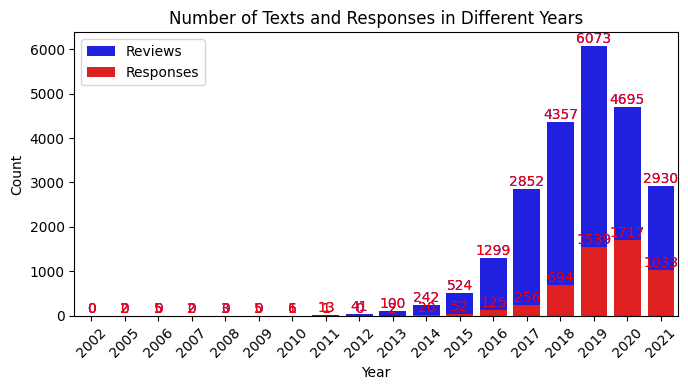

In [20]:
# plot with numbers of texts and responses in different years

df_year_text = df.groupby("Year")["text"].count().reset_index()
df_year_resp = df.groupby("Year")["response_text"].count().reset_index()

plt.figure(figsize=(7, 4))
ax1 = sns.barplot(x='Year', y='text', data=df_year_text, color='blue', label='Reviews')
ax2 = sns.barplot(x='Year', y='response_text', data=df_year_resp, color='red', label='Responses')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Texts and Responses in Different Years')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Add data labels to the bars
for p in ax1.patches:
    ax1.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', color='blue')
for p in ax2.patches:
    ax2.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', color='red')
plt.show()


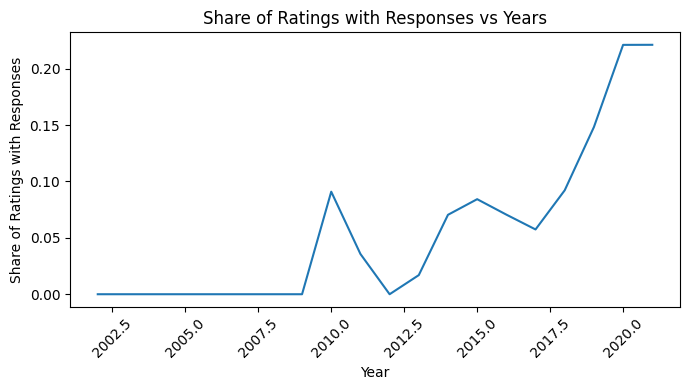

In [21]:
df_year_rating_resp = df.groupby("Year")['has_response'].mean().reset_index()
plt.figure(figsize=(7, 4))
plt.plot(df_year_rating_resp['Year'], df_year_rating_resp['has_response'])
plt.xlabel('Year')
plt.ylabel('Share of Ratings with Responses')
plt.title('Share of Ratings with Responses vs Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can see that in the early years all reviews remained unanswered.
Since 2009, the share of reviews that owners respond to has grown quite rapidly and reached more than 20% in 2020.

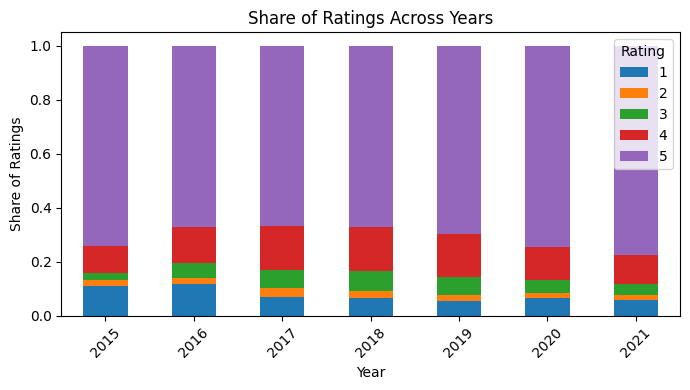

In [22]:
# Create pivot with shares of ratings in different years

df_rating_year = df[df["Year"] >= 2015].groupby(["Year", "rating"])["rating"].count().reset_index(name="count") #Before 2015 there are not enough review for the reliable analysis
pivot_table = df_rating_year.pivot(index='Year', columns='rating', values='count')

# Calculate the total count for each year
pivot_table['Total'] = pivot_table.sum(axis=1)

# Calculate the share of each rating for each year
for rating in range(1, 6):
    pivot_table[rating] = pivot_table[rating] / pivot_table['Total']

# Drop the 'Total' column
pivot_table = pivot_table.drop('Total', axis=1)

# Display the pivot table
pivot_table.plot(kind='bar', stacked=True, figsize=(7, 4))
plt.xlabel('Year')
plt.ylabel('Share of Ratings')
plt.title('Share of Ratings Across Years')
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.tight_layout()
plt.show()


We see that the share of excellent ratings is generally growing, while the share of negative ratings is decreasing.

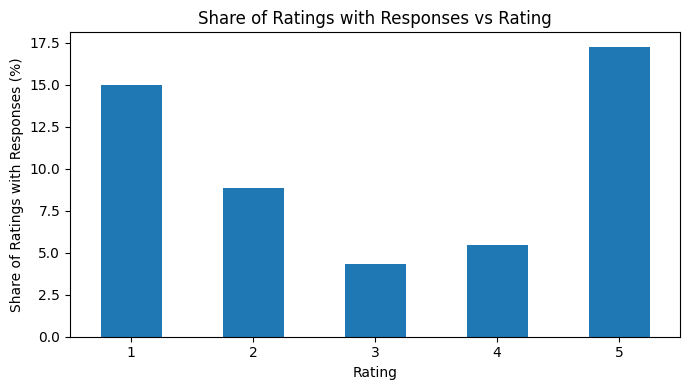

In [23]:
# Share of ratings with responses vs rating

df_rating_resp = df[df['has_response'] == 1].groupby('rating')['rating'].count() / df.groupby('rating')['rating'].count() * 100
df_rating_resp.plot(kind='bar', figsize=(7, 4))
plt.xlabel('Rating')
plt.ylabel('Share of Ratings with Responses (%)')
plt.title('Share of Ratings with Responses vs Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Owners usually response to positive and very negative ratings. They rarely text responses to 2-4 ratings

Look at the all correlations between numerical data in the main dataset

In [24]:
columns = ['rating',	'time_ms',	'has_pics',	'has_response',	'num_of_pictures',	'len_review_text',	'response_time_ms',	'len_response_text',	'time_to_resp_days']
corr = df[columns].corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,rating,time_ms,has_pics,has_response,num_of_pictures,len_review_text,response_time_ms,len_response_text,time_to_resp_days
rating,1.000000,0.067055,0.016523,0.068662,0.014220,-0.218856,0.113853,-0.413210,-0.022664
time_ms,0.067055,1.000000,0.045259,0.162894,0.032782,-0.040551,0.957943,-0.094981,-0.318146
has_pics,0.016523,0.045259,1.000000,-0.044446,0.567474,0.057619,0.010217,0.004496,0.002981
has_response,0.068662,0.162894,-0.044446,1.000000,-0.030186,0.075830,nan,nan,nan
num_of_pictures,0.014220,0.032782,0.567474,-0.030186,1.000000,0.055613,0.013318,0.002506,0.005791
len_review_text,-0.218856,-0.040551,0.057619,0.075830,0.055613,1.000000,-0.105239,0.242123,-0.003021
response_time_ms,0.113853,0.957943,0.010217,nan,0.013318,-0.105239,1.000000,-0.122037,-0.032718
len_response_text,-0.413210,-0.094981,0.004496,nan,0.002506,0.242123,-0.122037,1.000000,-0.072366
time_to_resp_days,-0.022664,-0.318146,0.002981,nan,0.005791,-0.003021,-0.032718,-0.072366,1.000000


According to the correlation analysis we can see that rating correlates with:
* time
* has_response
* length of review text and the response text
* time to response

<div class="alert alert-block alert-warning">

## 4. Examining Metadata <a class="anchor" name="examine2"></a>

 </div>

<div class="alert alert-block alert-warning">

### 4.1. Download Metadata <a class="anchor" name="examine2"></a>

 </div>

In [25]:
# download metadata
lst_meta = []
n_founded = 0
counter = 0
with open(directory_path+"meta-California.json", 'r') as f:
  for line in f:
    counter += 1
    #if counter % 50000 == 0:
    #  print(counter)
    lst_meta.append(json.loads(line))


In [26]:
df_meta = pd.DataFrame(lst_meta)
print(f"The table contain {df_meta.shape[0]} rows and {df_meta.shape[1]} columns")
df_meta.head(3)

The table contain 515961 rows and 15 columns


,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,City Textile,"City Textile, 30...",0x80c2c98c0e3c16...,None,34.018891,-118.21529,[Textile exporter],4.5,6,None,None,None,Open now,[0x80c2c624136ea...,https://www.goog...
1,San Soo Dang,"San Soo Dang, 76...",0x80c2c778e3b73d...,None,34.058092,-118.29213,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30...",{'Service option...,Open ⋅ Closes 6PM,[0x80c2c78249aba...,https://www.goog...
2,Nova Fabrics,"Nova Fabrics, 22...",0x80c2c89923b27a...,None,34.023669,-118.23293,[Fabric store],3.3,6,None,"[[Thursday, 9AM–...",{'Service option...,Open ⋅ Closes 5PM,[0x80c2c88114772...,https://www.goog...


In [27]:
# replace None by np.nan. It is much more convenient to work with NaN
df_meta = df_meta.fillna(np.nan)
df_meta.head(3)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,City Textile,"City Textile, 30...",0x80c2c98c0e3c16...,NaN,34.018891,-118.21529,[Textile exporter],4.5,6,NaN,NaN,NaN,Open now,[0x80c2c624136ea...,https://www.goog...
1,San Soo Dang,"San Soo Dang, 76...",0x80c2c778e3b73d...,NaN,34.058092,-118.29213,[Korean restaurant],4.4,18,NaN,"[[Thursday, 6:30...",{'Service option...,Open ⋅ Closes 6PM,[0x80c2c78249aba...,https://www.goog...
2,Nova Fabrics,"Nova Fabrics, 22...",0x80c2c89923b27a...,NaN,34.023669,-118.23293,[Fabric store],3.3,6,NaN,"[[Thursday, 9AM–...",{'Service option...,Open ⋅ Closes 5PM,[0x80c2c88114772...,https://www.goog...


In [28]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515961 entries, 0 to 515960
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              515951 non-null  object 
 1   address           508257 non-null  object 
 2   gmap_id           515961 non-null  object 
 3   description       111921 non-null  object 
 4   latitude          515961 non-null  float64
 5   longitude         515961 non-null  float64
 6   category          513585 non-null  object 
 7   avg_rating        515961 non-null  float64
 8   num_of_reviews    515961 non-null  int64  
 9   price             109801 non-null  object 
 10  hours             414982 non-null  object 
 11  MISC              433038 non-null  object 
 12  state             372248 non-null  object 
 13  relative_results  475497 non-null  object 
 14  url               515961 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 59.0+ MB


According to metadata info we can describe metadata set:
* name: The name of the place or entity. (515,951 non-null)
* address: The physical address of the place. (508,257 non-null)
* gmap_id: The unique identifier for the place on Google Maps. (515,961 non-null)
* description: A brief description of the place. (111,921 non-null)
* latitude: The latitude coordinate of the place. (515,961 non-null)
* longitude: The longitude coordinate of the place. (515,961 non-null)
* category: The category or type of place (e.g., Korean restaurant, park). (513,585 non-null, list)
* avg_rating: The average rating of the place. (515,961 non-null, float64)
* num_of_reviews: The number of reviews the place has received. (515,961 non-null, int64)
* price: The price range or average check associated with the place. (109,801 non-null)
* hours: The operating hours of the place. (414,982 non-null, list)
* MISC: Miscellaneous information about the place. (433,038 non-null, list)
* state: The state or region where the place is located. (372,248 non-null)
* relative_results: Related results or similar places. (475,497 non-null, list)
* url: The URL to the place’s webpage or Google Maps link. (515,961 non-null)

<div class="alert alert-block alert-warning">

### 4.2 Understand the auxiliary metadata dataset <a class="anchor" name="examine2"></a>

 </div>
Metadata is very rich, it will take a lot of time to analyze everything. We will focus on analyzing:
* average check estimates (**price**)
* workhours (**hours**)

as examples

Look at the **price** column

In [29]:
print(f"Unique values in column 'price': {list(df_meta['price'].unique())}")
df_price = df_meta.groupby('price')['price'].count().reset_index(name='count')

print("\nTable with the frequency of different outcomes")
df_price

Unique values in column 'price': [nan, '$', '$$', '$$$', '$$$$', '₩', '₩₩', '₩₩₩', '₩₩₩₩']

Table with the frequency of different outcomes


,price,count
0,$,54781
1,$$,49820
2,$$$,3633
3,$$$$,450
4,₩,543
5,₩₩,544
6,₩₩₩,29
7,₩₩₩₩,1


The meaning of **price** column is range from cheap $/₩ to very expensive $$$$/₩₩₩₩

Transform it using label encoding

Create **avg_check** feature which range from 1 for cheapest places to 4 for very expensive ones

In [30]:
df_meta['avg_check']=df_meta['price'].apply(lambda x: len(x) if pd.notna(x) else np.nan)

The column **hours** contains information about the business's operating hours. Many features can be built and analyzed from this data, but we will focus only on weekend operations and 24-hour service.

We create 3 new features:
* **hours_on_Saturday**: the work regime on Saturday
* **hours_on_Sunday**: the work regime on Sunday
* **open_24/7**: if it is 24-hour service


In [31]:
# Extract info if the business works on the weekday
def open_time(lst, weekday):
  for d in lst:
    if d[0] == weekday:
      return d[1]
  return np.nan

# Extract info if the business works 24-hours/7 days a week
def open_24_7(lst):
  for d in lst:
    if d[1] != 'Open 24 hours':
      return 0
  return 1

# Create new features
df_meta['hours_on_Saturday']=df_meta['hours'].apply(lambda x: open_time(x, "Saturday") if isinstance(x, list) else np.nan)
df_meta['hours_on_Sunday']=df_meta['hours'].apply(lambda x: open_time(x, "Sunday") if isinstance(x, list) else np.nan)
df_meta['open_24/7']=df_meta['hours'].apply(lambda x: open_24_7(x) if isinstance(x, list) else np.nan)

print(f"The table contain {df_meta.shape[0]} rows and {df_meta.shape[1]} columns")
df_meta.head(3)

The table contain 515961 rows and 19 columns


,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,avg_check,hours_on_Saturday,hours_on_Sunday,open_24/7
0,City Textile,"City Textile, 30...",0x80c2c98c0e3c16...,NaN,34.018891,-118.21529,[Textile exporter],4.5,6,NaN,NaN,NaN,Open now,[0x80c2c624136ea...,https://www.goog...,NaN,NaN,NaN,NaN
1,San Soo Dang,"San Soo Dang, 76...",0x80c2c778e3b73d...,NaN,34.058092,-118.29213,[Korean restaurant],4.4,18,NaN,"[[Thursday, 6:30...",{'Service option...,Open ⋅ Closes 6PM,[0x80c2c78249aba...,https://www.goog...,NaN,6:30AM–6PM,7AM–12PM,0.0
2,Nova Fabrics,"Nova Fabrics, 22...",0x80c2c89923b27a...,NaN,34.023669,-118.23293,[Fabric store],3.3,6,NaN,"[[Thursday, 9AM–...",{'Service option...,Open ⋅ Closes 5PM,[0x80c2c88114772...,https://www.goog...,NaN,Closed,Closed,0.0


We create 2 new features:
* **work_on_Saturday**: if the business works on Saturday
* **work_on_Sunday**: if the business works on Sunday

In [32]:
df_meta['work_on_Sunday'] = df_meta['hours_on_Sunday'].apply(lambda x: 0 if x == 'Closed' else (np.nan if pd.isna(x) else 1))
df_meta['work_on_Saturday'] = df_meta['hours_on_Saturday'].apply(lambda x: 0 if x == 'Closed' else (np.nan if pd.isna(x) else 1))
df_meta = df_meta.drop(['hours_on_Saturday', 'hours_on_Sunday'], axis=1)

print(f"The table contain {df_meta.shape[0]} rows and {df_meta.shape[1]} columns")
df_meta.head(3)

The table contain 515961 rows and 19 columns


,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,avg_check,open_24/7,work_on_Sunday,work_on_Saturday
0,City Textile,"City Textile, 30...",0x80c2c98c0e3c16...,NaN,34.018891,-118.21529,[Textile exporter],4.5,6,NaN,NaN,NaN,Open now,[0x80c2c624136ea...,https://www.goog...,NaN,NaN,NaN,NaN
1,San Soo Dang,"San Soo Dang, 76...",0x80c2c778e3b73d...,NaN,34.058092,-118.29213,[Korean restaurant],4.4,18,NaN,"[[Thursday, 6:30...",{'Service option...,Open ⋅ Closes 6PM,[0x80c2c78249aba...,https://www.goog...,NaN,0.0,1.0,1.0
2,Nova Fabrics,"Nova Fabrics, 22...",0x80c2c89923b27a...,NaN,34.023669,-118.23293,[Fabric store],3.3,6,NaN,"[[Thursday, 9AM–...",{'Service option...,Open ⋅ Closes 5PM,[0x80c2c88114772...,https://www.goog...,NaN,0.0,0.0,0.0


In [33]:
df_meta.describe()

,latitude,longitude,avg_rating,num_of_reviews,avg_check,open_24/7,work_on_Sunday,work_on_Saturday
count,515961.000000,515961.000000,515961.000000,515961.000000,109801.000000,414982.000000,414982.000000,414982.000000
mean,35.538558,-119.412233,4.278333,136.696334,1.537709,0.063333,0.621911,0.803784
std,2.137430,3.410867,0.627410,375.423986,0.583034,0.243561,0.484911,0.397134
min,21.881041,-140.173392,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,33.897430,-121.574379,4.000000,8.000000,1.000000,0.000000,0.000000,1.000000
50%,34.218867,-118.448297,4.400000,33.000000,1.000000,0.000000,1.000000,1.000000
75%,37.680093,-117.868463,4.700000,108.000000,2.000000,0.000000,1.000000,1.000000
max,44.393000,180.000000,5.000000,9998.000000,4.000000,1.000000,1.000000,1.000000


<div class="alert alert-block alert-warning">

### 4.3. Evaluate the usefulness of the metadata <a class="anchor" name="examine2"></a>

 </div>


Let's check some hypothesis to understand if the metadata is useful for analysis

First hypothesis:

Open 24/7 and work in weekends influences on the average ratings

In [34]:
def compare_two_groups_avg(df, col_x, col_y, alpha=0.05, showfliers=True):
  """ This function statistically compare two groups of data based on a specified column.
      It
        - creates boxplot
        - calculates key statistics
        - performs a t-test for means of two groups
        - prints the results

      col_x - column name which contains the group
      col_y - column name which contains the target variable
      alpha - significance level for the test
  """

  # Show boxplot
  df_notna = df[[col_x, col_y]].dropna()
  plt.figure(figsize=(7, 4))
  sns.boxplot(x=col_x, y=col_y, data=df_notna, showfliers=showfliers)
  plt.xlabel(col_x)
  plt.ylabel(col_y)
  plt.title(f'{col_y} by {col_x}')
  plt.show()

  # Separate the data into two groups
  gr_y = df_notna[df_notna[col_x] == 1][col_y]
  gr_n = df_notna[df_notna[col_x] == 0][col_y]

  # Calculate key statistics
  stats_df = pd.DataFrame({
      'Group': [col_x, 'Not '+col_x],
      'Mean': [gr_y.mean(), gr_n.mean()],
      'Median': [gr_y.median(), gr_n.median()],
      'Standard Deviation': [gr_y.std(), gr_n.std()],
      'Mean - 2 sigma': [gr_y.mean() - 2 * gr_y.std(), gr_n.mean() - 2 * gr_n.std()],
      'Mean + 2 sigma': [gr_y.mean() + 2 * gr_y.std(), gr_n.mean() + 2 * gr_n.std()],
      'Count': [gr_y.count(), gr_n.count()]
  })
  print("\n")

  # Display the statistics table
  display(stats_df)

  # Perform a t-test
  t_statistic, p_value = stats.ttest_ind(gr_y, gr_n, equal_var=False, nan_policy='omit')

  print("\nT-statistic:", round(t_statistic, 2))
  print("P-value:", round(p_value ,4))

  # Interpret the results
  if p_value < alpha:
    print(f"The difference in {col_y} between {col_x} and not is statistically significant.")
  else:
    print(f"The difference in {col_y} between {col_x} and not is not statistically significant.")

Compare average ratings for two groups of businesses: open 24-hours and not

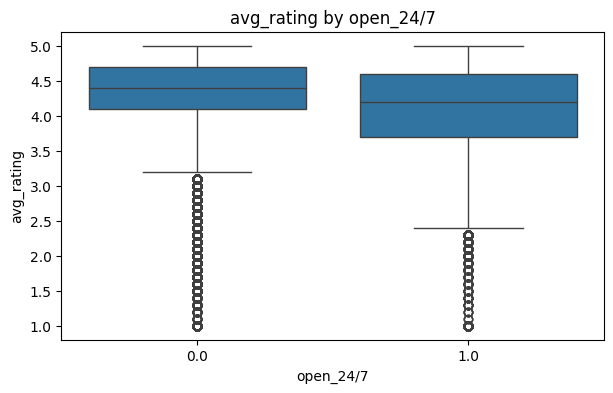

,Group,Mean,Median,Standard Deviation,Mean - 2 sigma,Mean + 2 sigma,Count
0,open_24/7,4.073986,4.2,0.739032,2.595921,5.552051,26282
1,Not open_24/7,4.302893,4.4,0.569584,3.163726,5.442060,388700



T-statistic: -49.23
P-value: 0.0
The difference in avg_rating between open_24/7 and not is statistically significant.


In [35]:
compare_two_groups_avg(df_meta, 'open_24/7', 'avg_rating')

We can see that the average rating for 24-hours business is significantly lower.

Second hypothesis:
Number of review depends on the 24-hour availablity

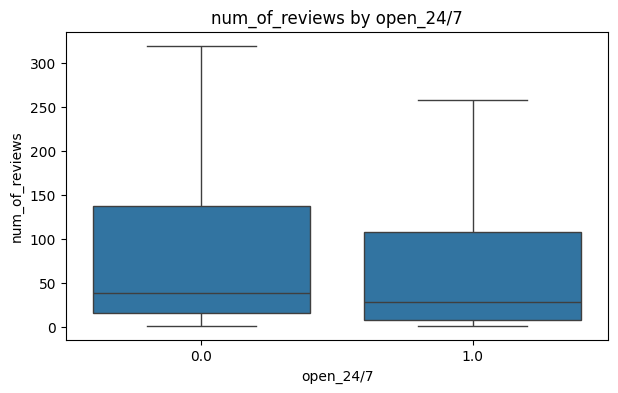

,Group,Mean,Median,Standard Deviation,Mean - 2 sigma,Mean + 2 sigma,Count
0,open_24/7,156.415684,28.0,446.928406,-737.441128,1050.272496,26282
1,Not open_24/7,151.220612,38.0,376.698767,-602.176922,904.618147,388700



T-statistic: 1.84
P-value: 0.0657
The difference in num_of_reviews between open_24/7 and not is not statistically significant.


In [36]:
compare_two_groups_avg(df_meta, 'open_24/7', 'num_of_reviews', showfliers=False)

We can reject the hypothesis

Check the third hypothesis:
If work on weekend influences on the average rating

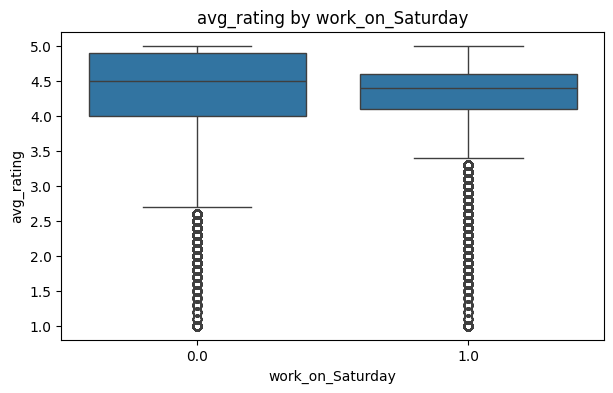

,Group,Mean,Median,Standard Deviation,Mean - 2 sigma,Mean + 2 sigma,Count
0,work_on_Saturday,4.281946,4.4,0.540588,3.200771,5.363122,333556
1,Not work_on_Satu...,4.314813,4.5,0.736774,2.841266,5.788361,81426



T-statistic: -11.97
P-value: 0.0
The difference in avg_rating between work_on_Saturday and not is statistically significant.


In [37]:
compare_two_groups_avg(df_meta, 'work_on_Saturday', 'avg_rating')

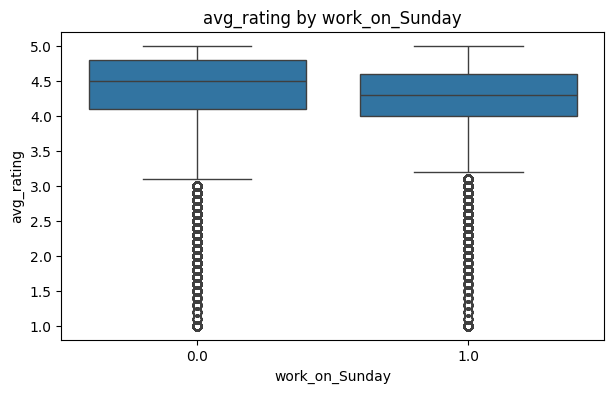

,Group,Mean,Median,Standard Deviation,Mean - 2 sigma,Mean + 2 sigma,Count
0,work_on_Sunday,4.254822,4.3,0.519039,3.216743,5.292900,258082
1,Not work_on_Sunday,4.343620,4.5,0.674828,2.993964,5.693277,156900



T-statistic: -44.7
P-value: 0.0
The difference in avg_rating between work_on_Sunday and not is statistically significant.


In [38]:
compare_two_groups_avg(df_meta, 'work_on_Sunday', 'avg_rating')

Yes, we can see that there is a significant difference between open on weekend and not businesses

Check the forth hypothesis:
If there is a relations between the average check and the average rating

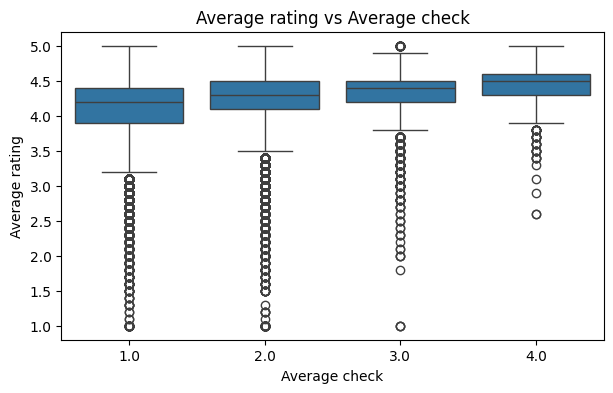

In [39]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='avg_check', y='avg_rating', data=df_meta)
plt.xlabel('Average check')
plt.ylabel('Average rating')
plt.title('Average rating vs Average check')
plt.show()


Create three bins for average rating: [1, 2], [2, 4], [4, 5] and put it into **rating_group** column

In [40]:
# Create bins for avg_rating
bins = [1, 2, 4, 5]
labels = ['1-2', '2-4', '4-5']
df_meta['rating_group'] = pd.cut(df_meta['avg_rating'], bins=bins, labels=labels, right=False)

# Calculate the crosstab
rating_avg_check_table = pd.crosstab(df_meta['avg_check'], df_meta['rating_group'], margins=True, margins_name="Total")
rating_avg_check_table


rating_group,1-2,2-4,4-5,Total
avg_check,,,,
1.0,141,15120,39721,54982
2.0,106,9108,40798,50012
3.0,4,495,3134,3633
4.0,0,49,394,443
Total,251,24772,84047,109070


Calculate share of all observations with different rating group and different average check

In [41]:
rating_avg_check_table_share = rating_avg_check_table.div(rating_avg_check_table["Total"], axis=0)
rating_avg_check_table_share

rating_group,1-2,2-4,4-5,Total
avg_check,,,,
1.0,0.002564,0.274999,0.722436,1.0
2.0,0.002119,0.182116,0.815764,1.0
3.0,0.001101,0.136251,0.862648,1.0
4.0,0.000000,0.110609,0.889391,1.0
Total,0.002301,0.227120,0.770579,1.0


We can see that there is a relationship between the average check and the average rating. The higher the average check, the lower the share of businesses with a low average rating and the higher the share of businesses with a high rating.

So we expect that using the metadata with conjunction with the main dataset can significantly impove the analysis. Meta data is very rich. We check some examples and found that metadata can give us many keys to understand our review data.

<div class="alert alert-block alert-warning">

### 4.4. Decide whether to incorporate the metadata into your analysis. <a class="anchor" name="examine2"></a>

 </div>


Based on the previous analysis, we decided to incorporate the metadata into your dataset.


For further analysis, we will create two new datasets:

* **business_df**: contains information on businesses from the main dataset and from metadata
* **review_df**: contains full information about the review enriched with metadata

In [42]:
obj_df = df.groupby('gmap_id', group_keys=False).apply(
    lambda x: {
        "gmap_id": x['gmap_id'].iloc[0],
        "avg_obs_rating": x['rating'].mean(),
        "number_of_reviews": x['rating'].count(),
        "number_of_pics": x['has_pics'].sum(),
        "number_of_responses": x['has_response'].sum(),
        "avg_number_of_pics": x['num_of_pictures'].mean(),
        "avg_time_to_response": x['time_to_resp_days'].mean(),
        "earliest_review_date": str(x.loc[x['time_ms'].idxmin(), 'time']),
        "latest_review_date": str(x.loc[x['time_ms'].idxmax(), 'time'])
    }
)
obj_df = pd.DataFrame(obj_df.tolist())
business_df = pd.merge(obj_df, df_meta, left_on='gmap_id', right_on='gmap_id', how='left')
print(f"The table contain {business_df.shape[0]} rows and {business_df.shape[1]} columns")
business_df.head(3)

The table contain 176 rows and 28 columns


,gmap_id,avg_obs_rating,number_of_reviews,number_of_pics,number_of_responses,avg_number_of_pics,avg_time_to_response,earliest_review_date,latest_review_date,name,...,hours,MISC,state,relative_results,url,avg_check,open_24/7,work_on_Sunday,work_on_Saturday,rating_group
0,0x54d4000810cde3...,3.625000,56,5,1,0.107143,29.238383,2013-02-10 17:56:11,2021-06-02 02:16:27,L C Nails,...,"[[Friday, 10AM–7...",{'Accessibility'...,Open ⋅ Closes 7PM,[0x54d3ffe26cea8...,https://www.goog...,NaN,0.0,1.0,1.0,2-4
1,0x808164de573086...,2.649351,77,0,0,0.000000,NaN,2014-05-19 17:31:44,2021-05-27 05:20:08,Comcast Service ...,...,"[[Tuesday, 9AM–5...",{'Accessibility'...,Closed ⋅ Opens 9AM,[0x808164fbda955...,https://www.goog...,NaN,0.0,0.0,0.0,2-4
2,0x808327ba5f197e...,4.703390,118,2,0,0.016949,NaN,2014-11-17 03:18:13,2021-05-12 22:08:43,The Dungeon,...,"[[Friday, 10AM–1...",{'Service option...,Open ⋅ Closes 12AM,[0x808327aec3337...,https://www.goog...,NaN,0.0,1.0,1.0,4-5


This dataframe contains new columns:
* **avg_obs_rating**: average rating from the main dataset
* **number_of_reviews**: number of reviews for the business from the main dataset
* **number_of_pics**: number of pictures from all reviews
* **number_of_responses**: number of responses from all reviews
* **avg_number_of_pics**: average number of pictures from reviews
* **avg_time_to_response**: average time to response to review
* **earliest_review_date**: the date of earlies review
* **latest_review_date**: the date of latest review

In [43]:
review_df = pd.merge(df, df_meta, left_on='gmap_id', right_on='gmap_id', how='left')
print(f"The table contain {review_df.shape[0]} rows and {review_df.shape[1]} columns")
review_df.head(3)


The table contain 37706 rows and 41 columns


,user_id,name_x,gmap_id,rating,time_ms,pics,text,resp,time,if_pic,...,hours,MISC,state,relative_results,url,avg_check,open_24/7,work_on_Sunday,work_on_Saturday,rating_group
0,1127197139207744...,Michael Tobin,0x80843e0cb60c8a...,5,1.620010e+12,NaN,easy to find. am...,NaN,2021-05-03 02:50:05,N,...,NaN,{'Accessibility'...,NaN,[0x80843e0cbd5dc...,https://www.goog...,NaN,NaN,NaN,NaN,4-5
1,1149013322618004...,Email1 Email1,0x80843e0cb60c8a...,4,1.606695e+12,[{'url': ['https...,very good hambur...,NaN,2020-11-30 00:16:27,Y,...,NaN,{'Accessibility'...,NaN,[0x80843e0cbd5dc...,https://www.goog...,NaN,NaN,NaN,NaN,4-5
2,1130707628982658...,Morgan H.,0x80843e0cb60c8a...,5,1.614154e+12,NaN,everything one c...,NaN,2021-02-24 08:02:57,N,...,NaN,{'Accessibility'...,NaN,[0x80843e0cbd5dc...,https://www.goog...,NaN,NaN,NaN,NaN,4-5


Look at the new dataset with business information

In [44]:
columns = ['avg_obs_rating',	'number_of_reviews',	'number_of_pics',	'number_of_responses',	'avg_number_of_pics',	'avg_time_to_response',	'avg_check',	'open_24/7',	'work_on_Sunday',	'work_on_Saturday']
business_df[columns].describe()

,avg_obs_rating,number_of_reviews,number_of_pics,number_of_responses,avg_number_of_pics,avg_time_to_response,avg_check,open_24/7,work_on_Sunday,work_on_Saturday
count,176.000000,176.000000,176.000000,176.000000,176.000000,84.000000,41.000000,164.000000,164.000000,164.000000
mean,4.304900,214.238636,6.215909,30.909091,0.082452,43.434895,1.609756,0.085366,0.652439,0.896341
std,0.594526,317.106940,21.254350,91.440240,0.152642,102.737363,0.702782,0.280281,0.477654,0.305751
min,1.794118,51.000000,0.000000,0.000000,0.000000,0.014325,1.000000,0.000000,0.000000,0.000000
25%,4.158145,74.000000,1.000000,0.000000,0.008309,2.005160,1.000000,0.000000,0.000000,1.000000
50%,4.449329,108.000000,2.000000,0.000000,0.025978,8.066735,2.000000,0.000000,1.000000,1.000000
75%,4.702443,199.000000,5.000000,22.000000,0.094878,30.561128,2.000000,0.000000,1.000000,1.000000
max,5.000000,2853.000000,252.000000,867.000000,1.083333,652.133506,4.000000,1.000000,1.000000,1.000000


In [45]:
corr = business_df[columns].corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,avg_obs_rating,number_of_reviews,number_of_pics,number_of_responses,avg_number_of_pics,avg_time_to_response,avg_check,open_24/7,work_on_Sunday,work_on_Saturday
avg_obs_rating,1.000000,0.110190,0.059649,0.191582,0.101857,0.020203,0.260584,-0.208947,-0.086150,-0.034506
number_of_reviews,0.110190,1.000000,0.763038,0.353307,0.002016,-0.092679,0.163701,-0.075178,0.147295,0.130724
number_of_pics,0.059649,0.763038,1.000000,-0.050767,0.241600,-0.060914,0.208534,-0.041226,0.117451,0.072638
number_of_responses,0.191582,0.353307,-0.050767,1.000000,-0.134847,-0.083061,-0.159623,-0.001512,-0.074049,0.078366
avg_number_of_pics,0.101857,0.002016,0.241600,-0.134847,1.000000,-0.067560,0.652371,-0.017333,0.069886,0.065418
avg_time_to_response,0.020203,-0.092679,-0.060914,-0.083061,-0.067560,1.000000,-0.234947,-0.013870,-0.151949,0.054885
avg_check,0.260584,0.163701,0.208534,-0.159623,0.652371,-0.234947,1.000000,0.153426,-0.125749,0.143799
open_24/7,-0.208947,-0.075178,-0.041226,-0.001512,-0.017333,-0.013870,0.153426,1.000000,0.222979,0.103892
work_on_Sunday,-0.086150,0.147295,0.117451,-0.074049,0.069886,-0.151949,-0.125749,0.222979,1.000000,0.423922
work_on_Saturday,-0.034506,0.130724,0.072638,0.078366,0.065418,0.054885,0.143799,0.103892,0.423922,1.000000


According to this correlation matrix, we expect that there are relations betwee average rating and number of review, number of pictures (average and total), number of responses, average check, workhours

Look at the new dataset with review information

In [46]:
columns = ['rating', 'time_ms',	'has_pics',	'has_response',	'num_of_pictures',	'len_review_text', 'response_time_ms', 'len_response_text', 'time_to_resp_days',	'avg_check',	'open_24/7',	'work_on_Sunday',	'work_on_Saturday']
review_df[columns].describe()

,rating,time_ms,has_pics,has_response,num_of_pictures,len_review_text,response_time_ms,len_response_text,time_to_resp_days,avg_check,open_24/7,work_on_Sunday,work_on_Saturday
count,37706.000000,3.770600e+04,37706.000000,37706.000000,37706.000000,23149.000000,5.440000e+03,5440.000000,5440.000000,16155.000000,36123.000000,36123.000000,36123.000000
mean,4.401315,1.553279e+12,0.029014,0.144274,0.082905,153.156249,1.574846e+12,152.172426,27.272253,1.755370,0.054259,0.756305,0.955347
std,1.137600,4.842597e+10,0.167848,0.351372,0.845165,222.421480,3.804089e+10,140.088650,133.268826,0.654279,0.226531,0.429317,0.206544
min,1.000000,1.019520e+12,0.000000,0.000000,0.000000,1.000000,1.390847e+12,1.000000,0.000418,1.000000,0.000000,0.000000,0.000000
25%,4.000000,1.525194e+12,0.000000,0.000000,0.000000,36.000000,1.553178e+12,68.000000,0.257565,1.000000,0.000000,1.000000,1.000000
50%,5.000000,1.558999e+12,0.000000,0.000000,0.000000,81.000000,1.580332e+12,125.000000,1.239871,2.000000,0.000000,1.000000,1.000000
75%,5.000000,1.590724e+12,0.000000,0.000000,0.000000,182.000000,1.605630e+12,209.000000,7.804583,2.000000,0.000000,1.000000,1.000000
max,5.000000,1.629503e+12,1.000000,1.000000,50.000000,4088.000000,1.628802e+12,2635.000000,2835.745932,4.000000,1.000000,1.000000,1.000000


In [47]:
corr = review_df[columns].corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,rating,time_ms,has_pics,has_response,num_of_pictures,len_review_text,response_time_ms,len_response_text,time_to_resp_days,avg_check,open_24/7,work_on_Sunday,work_on_Saturday
rating,1.000000,0.067055,0.016523,0.068662,0.014220,-0.218856,0.113853,-0.413210,-0.022664,0.130207,-0.032385,-0.054684,0.006367
time_ms,0.067055,1.000000,0.045259,0.162894,0.032782,-0.040551,0.957943,-0.094981,-0.318146,-0.010412,0.046523,0.041217,-0.011259
has_pics,0.016523,0.045259,1.000000,-0.044446,0.567474,0.057619,0.010217,0.004496,0.002981,0.072047,-0.006417,0.035419,0.014183
has_response,0.068662,0.162894,-0.044446,1.000000,-0.030186,0.075830,nan,nan,nan,-0.107654,0.054926,-0.199479,0.020122
num_of_pictures,0.014220,0.032782,0.567474,-0.030186,1.000000,0.055613,0.013318,0.002506,0.005791,0.074495,-0.000427,0.020561,0.007157
len_review_text,-0.218856,-0.040551,0.057619,0.075830,0.055613,1.000000,-0.105239,0.242123,-0.003021,0.090441,0.040507,-0.028010,-0.041217
response_time_ms,0.113853,0.957943,0.010217,nan,0.013318,-0.105239,1.000000,-0.122037,-0.032718,0.195638,0.200523,0.001119,-0.058844
len_response_text,-0.413210,-0.094981,0.004496,nan,0.002506,0.242123,-0.122037,1.000000,-0.072366,0.221848,0.046824,-0.117357,0.101573
time_to_resp_days,-0.022664,-0.318146,0.002981,nan,0.005791,-0.003021,-0.032718,-0.072366,1.000000,-0.188876,0.006756,-0.013412,-0.007075
avg_check,0.130207,-0.010412,0.072047,-0.107654,0.074495,0.090441,0.195638,0.221848,-0.188876,1.000000,0.043801,0.047465,0.085184


According to this correlation matrix, we expect that there are relations between rating of the review and time, if there is a response, length the review text and the response text, average check, workhours

<div class="alert alert-block alert-warning">

## 5.  Data Analysis <a class="anchor" name="DA"></a>

 </div>

 In this section, we are looking into 5 data insights from the data. We believe that by looking into different factors that can impact on a business rating, we can have a better understanding on the importance of responsing to review, location, workhours and other factors.



<div class="alert alert-block alert-info">
    
### 5.1. How is length of text review and length of text response related to average rating? <a class="anchor" name="DI1"></a>

Let's look at the relation between rating and the length of the review text

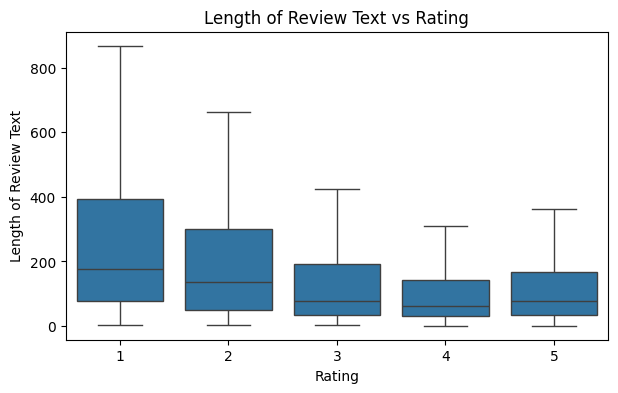

In [48]:
# create boxplot len_review_text vs rating
df_notna = review_df[['rating', 'len_review_text']].dropna()
plt.figure(figsize=(7,4))
sns.boxplot(x='rating', y='len_review_text', data=df_notna, showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Length of Review Text')
plt.title('Length of Review Text vs Rating')
plt.show()


We see that longer text usually has a bad rating.

Look at the regression of median rating on the length of the review text

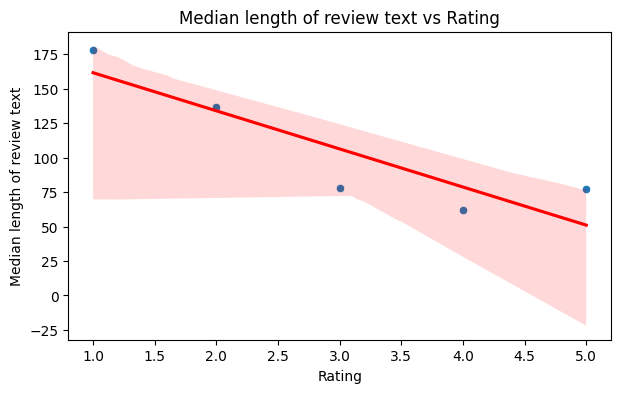

In [49]:
median_len_review_text_by_rating = df_notna.groupby('rating')['len_review_text'].median()

plt.figure(figsize=(7, 4))
sns.scatterplot(x=median_len_review_text_by_rating.index, y=median_len_review_text_by_rating.values)
sns.regplot(x=median_len_review_text_by_rating.index, y=median_len_review_text_by_rating.values, scatter=False, color='red')
plt.xlabel('Rating')
plt.ylabel('Median length of review text')
plt.title('Median length of review text vs Rating')
plt.show()


A low rating is usually accompanied by a longer text review. If a person gives a low rating, they usually provide a more detailed review of what they didn't like.

To enhance their Google Maps ratings, business owners should encourage customers to leave reviews by actively engaging with them. It’s common for low ratings to be accompanied by longer, more detailed reviews, often highlighting negative experiences. Additionally, customers who have had a negative experience are more likely to post reviews compared to those with average or positive experiences, as indicated by the disproportionate number of 1-star reviews compared to those in the 2-4 star range.

To address this, business owners can ask customers about their dining experience and kindly request a Google review, particularly from satisfied patrons. This proactive approach can help balance the ratings by increasing the number of positive reviews and providing a more accurate reflection of the overall customer experience.

<div class="alert alert-block alert-info">
    
### 5.2. How does average check impact the rating of a business? <a class="anchor" name="DI1"></a>

Look at the relation of ratings and average check

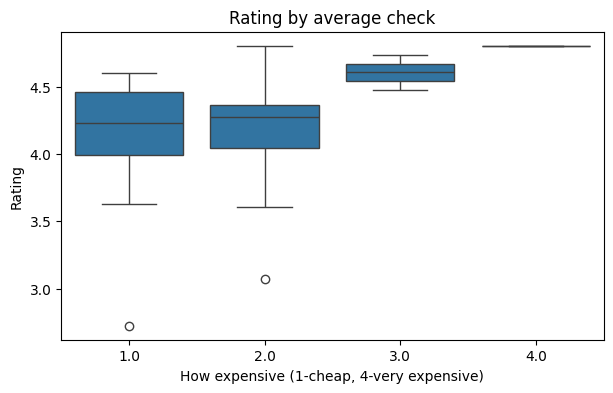

In [50]:
df_notna = business_df[['avg_obs_rating', 'avg_check']].dropna()
plt.figure(figsize=(7,4))
sns.boxplot(x='avg_check', y='avg_obs_rating', data=df_notna)
plt.xlabel('How expensive (1-cheap, 4-very expensive)')
plt.ylabel('Rating')
plt.title('Rating by average check')
plt.show()

In [51]:
# Create bins for avg_rating
bins = [1, 3, 4, 5]
labels = ['1-3', '3-4', '4-5']
review_df['rating_group'] = pd.cut(review_df['rating'], bins=bins, labels=labels, right=False)

# Calculate the crosstab
rating_avg_check_table = pd.crosstab(review_df['avg_check'], review_df['rating_group'], margins=True, margins_name="Total")

rating_avg_check_table_share = rating_avg_check_table.div(rating_avg_check_table["Total"], axis=0)
rating_avg_check_table_share

rating_group,1-3,3-4,4-5,Total
avg_check,,,,
1.0,0.281969,0.246067,0.471965,1.0
2.0,0.229155,0.225073,0.545773,1.0
3.0,0.119122,0.191223,0.689655,1.0
4.0,0.142857,0.214286,0.642857,1.0
Total,0.244313,0.231657,0.524031,1.0


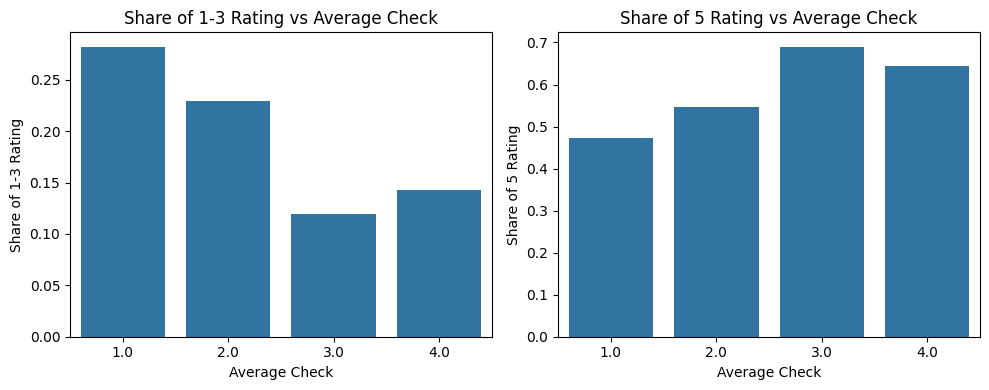

In [52]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: Share of 1-3 rating vs average check
sns.barplot(x=rating_avg_check_table_share.index[:-1], y=rating_avg_check_table_share['1-3'][:-1], ax=axes[0])
axes[0].set_xlabel('Average Check')
axes[0].set_ylabel('Share of 1-3 Rating')
axes[0].set_title('Share of 1-3 Rating vs Average Check')

# Plot 2: Share of 4-5 rating vs average check
sns.barplot(x=rating_avg_check_table_share.index[:-1], y=rating_avg_check_table_share['4-5'][:-1], ax=axes[1])
axes[1].set_xlabel('Average Check')
axes[1].set_ylabel('Share of 5 Rating')
axes[1].set_title('Share of 5 Rating vs Average Check')

# Adjust layout
plt.tight_layout()
plt.show()


Businesses are rated on a scale of 1 to 4 in terms of expensiveness, and an interesting trend emerges from this data. Businesses rated as less expensive (score of 1) tend to receive more low ratings compared to others. Conversely, businesses with a score of 4 (most expensive) have higher ratings than score 1 businesses but still fall short of those with a score of 3.

This phenomenon can be explained by the Price-Quality Heuristic, where customers perceive the service to be better simply because they pay more. However, the highest ratings are found in score-3 restaurants, which likely offer the best balance between price and quality, aligning well with customer expectations. In contrast, customers may approach score-4 restaurants with higher expectations, leading to greater potential for disappointment when those expectations are not fully met.

Based on this analysis, our recommendation for business owners or those planning to open a new business is to target the mid-price range (score 3) at the beginning if they aim to achieve higher ratings on Google Maps and attract more customers. This price point appears to provide the optimal balance between customer expectations and perceived value, leading to more favorable reviews.

<div class="alert alert-block alert-info">
    
### 5.3. How does response impact the rating of a business? <a class="anchor" name="DI1"></a>

Let's scrutinize if the responses to the review can improve the average rating

In [53]:
business_df["share_of_resp"] = business_df["number_of_responses"] / business_df["number_of_reviews"]

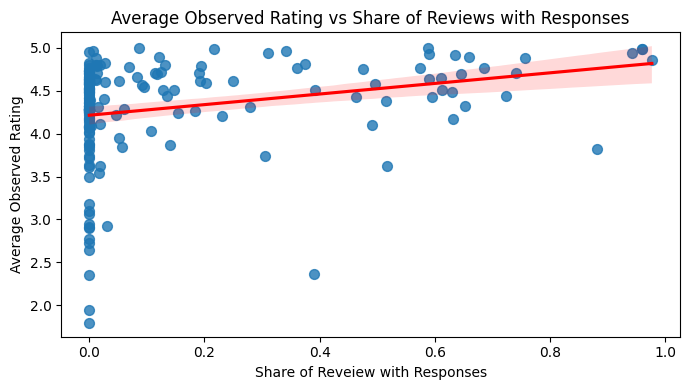

In [54]:
plt.figure(figsize=(7, 4))
sns.regplot(x='share_of_resp', y='avg_obs_rating', data=business_df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.xlabel('Share of Reveiew with Responses')
plt.ylabel('Average Observed Rating')
plt.title('Average Observed Rating vs Share of Reviews with Responses')
plt.tight_layout()
plt.show()


We can see that the response rate to reviews is positively related to the average rating.


In [55]:
# Create bins for share of responses
bins = [0, 0.01, 0.5, 1]
labels = ['0', '0-50%', '50%-100%']
business_df['share_resp_group'] = pd.cut(business_df['share_of_resp'], bins=bins, labels=labels, right=False)

# Calculate the crosstab
rating_share_resp_table = pd.crosstab(business_df['share_resp_group'], business_df['rating_group'], margins=True, margins_name="Total")
rating_share_resp_table_share = rating_share_resp_table.div(rating_share_resp_table["Total"], axis=0)
rating_share_resp_table_share

rating_group,1-2,2-4,4-5,Total
share_resp_group,,,,
0,0.010753,0.225806,0.763441,1.0
0-50%,0.000000,0.148148,0.851852,1.0
50%-100%,0.000000,0.095238,0.904762,1.0
Total,0.005952,0.184524,0.809524,1.0


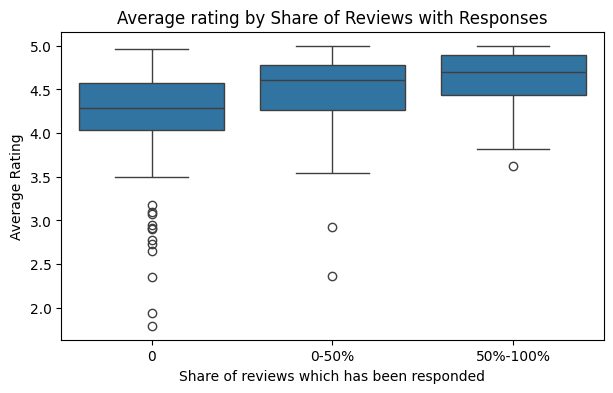

In [56]:
df_notna = business_df[['avg_obs_rating', 'share_resp_group']].dropna()
plt.figure(figsize=(7,4))
sns.boxplot(x='share_resp_group', y='avg_obs_rating', data=df_notna)
plt.xlabel('Share of reviews which has been responded')
plt.ylabel('Average Rating')
plt.title('Average rating by Share of Reviews with Responses')
plt.show()

We can see strong relation between the frequency of responses and average rating.

There is a correlation between the number of responses by business owners and their Google Maps ratings, regardless of whether the responses are to low or high ratings. Based on this observation, I recommend that business owners take a more proactive approach in responding to customer reviews. Engaging with customers through timely and thoughtful responses can contribute to improving the overall rating of their businesses.

<div class="alert alert-block alert-info">
    
### 5.4. How does location impact the rating of a business? <a class="anchor" name="DI1"></a>

It is very difficult to extract location from addresses and zip codes, so we decided to use clusterization by coordinates to separate our businesses by some regions. We think the center of the clusters will be the big cities or regions.

In [57]:
# Assuming 'coordinates' column contains (x, y) tuples
y = business_df['latitude'].tolist()
x = business_df['longitude'].tolist()
coordinates = list(zip(x, y))

# Choose the number of clusters
n_clusters = 5  # Adjust as needed

# Fit KMeans model
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(coordinates)


centers_lst = []
for i, c in enumerate(kmeans.cluster_centers_):
  centers_lst.append([i, c])

centers_lst.sort(key=lambda x: x[1][1])
label_dict = {}
for i, c in enumerate(centers_lst):
  label_dict[c[0]] = i

print("Replace labels:")
print(label_dict)

new_labels = [label_dict[l] for l in kmeans.labels_]

# Get cluster labels
business_df['cluster'] = new_labels

cluster_centers = kmeans.cluster_centers_

print("Cluster centers:")
print(cluster_centers)


Replace labels:
{2: 0, 0: 1, 4: 2, 3: 3, 1: 4}
Cluster centers:
[[-118.1125402    34.04178525]
 [-121.8481277    38.83369224]
 [-117.02713645   32.96947243]
 [-122.05344491   37.59524496]
 [-119.79411161   36.77254295]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Visualise the results of clusterisation

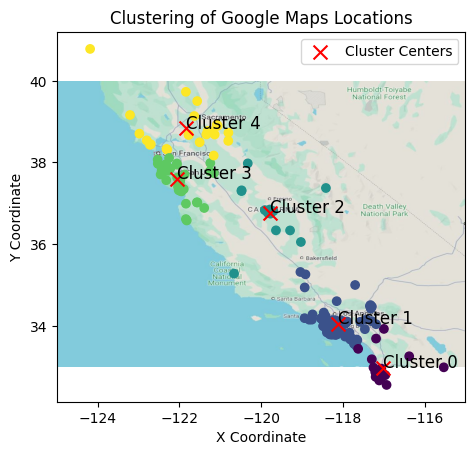

In [58]:
# Load an map as a background
def closest_point(center_lst, x, y):
  n = len(center_lst)
  dist = np.zeros(n)
  for i in range(n):
    dist[i] = np.sqrt((x - center_lst[i][0])**2 + (y - center_lst[i][1])**2)
  return np.argmin(dist)

try:
  img = plt.imread(directory_path + 'california.jpg')
  plt.imshow(img, extent=[-125, -115, 33, 40])
except:
  pass

# Scatter plot of observations with cluster assignments

plt.scatter([c[0] for c in coordinates], [c[1] for c in coordinates], c=business_df['cluster'], cmap='viridis')

# Plot cluster centers
plt.scatter([c[0] for c in cluster_centers], [c[1] for c in cluster_centers], marker='x', s=100, c='red', label='Cluster Centers')

# Add cluster labels
for i, center in enumerate(cluster_centers):
    representative_index = business_df[business_df['cluster'] == i].index[0]
    lat = business_df.loc[representative_index, 'latitude']
    lon = business_df.loc[representative_index, 'longitude']
    ind = closest_point(cluster_centers, lon, lat)
    plt.text(cluster_centers[ind][0], cluster_centers[ind][1], f"Cluster {i}", fontsize=12, color='black')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Clustering of Google Maps Locations')
plt.legend()
plt.show()

We can see that the centers of the clusters are in the bigest cities as we expected.
Cluster centers:
0. San Diego
1. Los Angeles
2. Fresno
3. San Francisco
4. Sacramento

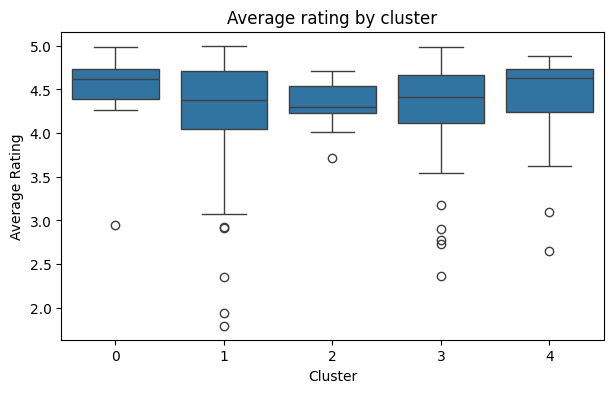

In [59]:
df_notna = business_df[['avg_obs_rating', 'cluster']].dropna()
plt.figure(figsize=(7,4))
sns.boxplot(x='cluster', y='avg_obs_rating', data=df_notna)
plt.xlabel('Cluster')
plt.ylabel('Average Rating')
plt.title('Average rating by cluster')
plt.show()

Our analysis indicates that the distribution of ratings varies significantly by location. For instance, in cities like San Diego and Fresno, ratings are more concentrated around 4.5, with a narrower spread. In contrast, larger cities such as San Francisco and Los Angeles exhibit a wider spread of ratings and a lower median rating compared to San Diego.

This suggests that different locations have distinct patterns in how people write reviews. As a result, we recommend that businesses exercise caution when extrapolating research findings from one location to another. Regional differences should be carefully considered to ensure that insights are relevant to the specific context of each business.

<div class="alert alert-block alert-info">
    
### 5.5. How does work on Sunday impact the rating of a business? <a class="anchor" name="DI1"></a>

From the previous step, we concluded that each location tend to have different patterns; thus, in this step we will look at the relation between rating and work on Sunday in different clusters.

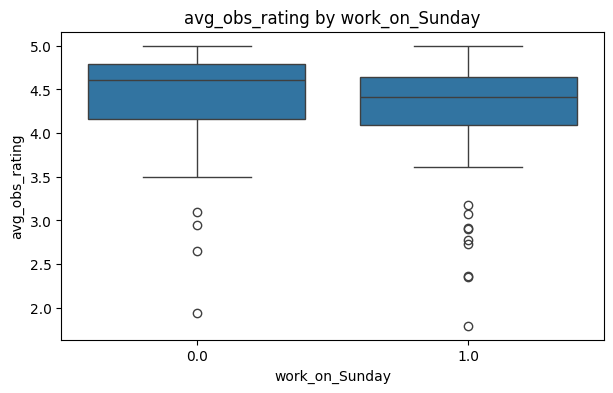

,Group,Mean,Median,Standard Deviation,Mean - 2 sigma,Mean + 2 sigma,Count
0,work_on_Sunday,4.264319,4.413793,0.595442,3.073434,5.455203,107
1,Not work_on_Sunday,4.372858,4.603175,0.612527,3.147805,5.597912,57



T-statistic: -1.09
P-value: 0.2776
The difference in avg_obs_rating between work_on_Sunday and not is not statistically significant.


In [60]:
compare_two_groups_avg(business_df, 'work_on_Sunday', 'avg_obs_rating')

We can see that the difference is not significant.

But as we showed in the previous analysis, some patterns can be specific for some region. Let's check if work on Sunday influences on average rating in different locations.

<div class=" alert-block alert-info">
    
### 5.5.1 Sacramento cluster <a class="anchor" name="cluster"></a>

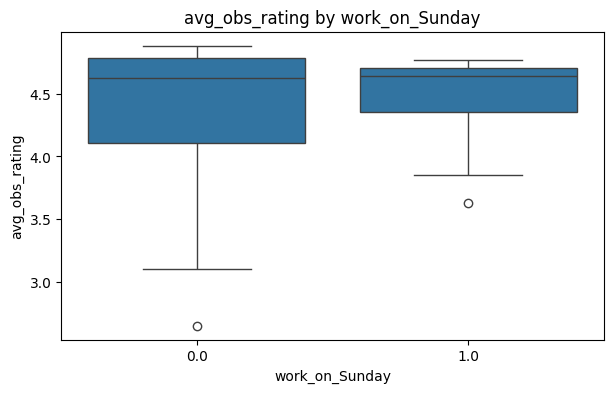

,Group,Mean,Median,Standard Deviation,Mean - 2 sigma,Mean + 2 sigma,Count
0,work_on_Sunday,4.449023,4.637931,0.372734,3.703555,5.194492,13
1,Not work_on_Sunday,4.246701,4.625000,0.820503,2.605696,5.887706,9



T-statistic: 0.69
P-value: 0.5042
The difference in avg_obs_rating between work_on_Sunday and not is not statistically significant.


In [61]:
df_c = business_df[(business_df['cluster'] == 4)]
compare_two_groups_avg(df_c, 'work_on_Sunday', 'avg_obs_rating')

In Sacramento cluster the businesses which work on Sunday have higher average rating, but the difference of averages in two groups are not significant.

<div class="alert alert-block alert-info">
    
### 5.5.2 San Francisco cluster <a class="anchor" name="cluster"></a>

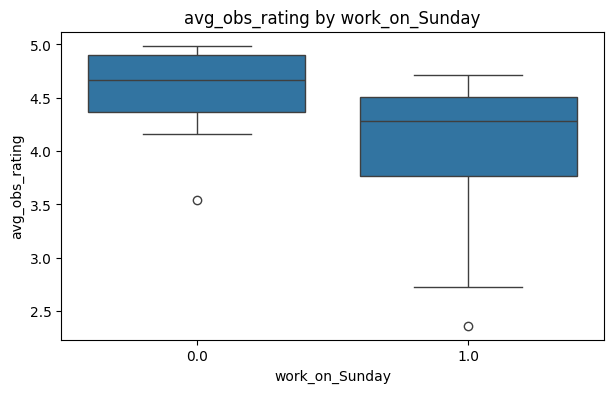

,Group,Mean,Median,Standard Deviation,Mean - 2 sigma,Mean + 2 sigma,Count
0,work_on_Sunday,4.031735,4.284408,0.712849,2.606038,5.457433,24
1,Not work_on_Sunday,4.573467,4.663265,0.438551,3.696364,5.450569,11



T-statistic: -2.76
P-value: 0.0099
The difference in avg_obs_rating between work_on_Sunday and not is statistically significant.


In [62]:
df_c = business_df[(business_df['cluster'] == 3)]
compare_two_groups_avg(df_c, 'work_on_Sunday', 'avg_obs_rating')

Our findings indicate that in San Francisco, businesses open on Sunday tend to receive lower average ratings compared to those that are closed. Several factors could contribute to this trend, one being the higher volume of customers on Sundays coupled with the higher cost of staffing, which may result in a lower staff-to-customer ratio and consequently, diminished service quality.

We recommend that business owners carefully evaluate whether opening on Sunday aligns with their service standards. If they choose to remain open, it is crucial to ensure adequate staffing to maintain high service levels.

Additionally, we suggest conducting a more in-depth analysis to determine if negative reviews are disproportionately associated with Sundays and the following day (Monday). If so, performing a text analysis on these reviews could help identify recurring themes, enabling businesses to address specific issues and improve customer satisfaction.

In addition to the factors already discussed, it’s important to consider that people often visit public places on Sundays to relax, making them less tolerant of any negative experiences. On Sundays, customers expect the food to be tastier and the service to be superior compared to a typical business lunch. Furthermore, weekends often involve family outings, which can heighten the difficulty of satisfying all customers’ needs. This effect is particularly pronounced in San Francisco compared to other areas.

<div class="alert alert-block alert-warning">

## 6.  Data Analysis <a class="anchor" name="summary"></a>

 </div>

Based on the analysis above, we investigate questions on:
1. How is length of review text and length of response text related to average rating?
2. How does the average price impact the rating of a business?
3. How does the number of response from owners impact the rating of a business?
4. Is there any difference between businesses in different locations?
5. How does working on Sunday impact the rating of a business?

Our findings and recommendations are:
1. Length of review text and length of response text are negatively correlated with the average rating of a business.
  
  **Recommendation:** Business owners can improve their Google Maps ratings by actively encouraging customers to leave reviews, especially from satisfied patrons. Since negative experiences are more likely to result in detailed, low-rating reviews, engaging with customers and requesting feedback can help balance ratings and better reflect overall customer satisfaction.

2. Businesses rated on a scale of 1 to 4 show that less expensive (score 1) receive more low ratings, while mid-priced (score 3) receive the highest ratings. The Price-Quality Heuristic suggests that customers perceive higher prices as better quality, but score-3 businesses offer the best balance of price and quality.

  **Recommendation:** For higher Google Maps ratings, targeting the mid-price range is recommended.

3. There is a correlation between the number of responses by business owners and their Google Maps ratings, regardless of whether the responses are to low or high ratings.

  **Recommendation:** Business owners take a more proactive approach in responding to customer reviews. Engaging with customers through timely and thoughtful responses can contribute to improving the overall rating of their businesses.

4. To address challenges in extracting location information, we clustered businesses by geographic coordinates. Our analysis shows that rating distributions vary by location: cities like San Diego and Fresno have ratings more concentrated around 4.5, while larger cities like San Francisco and Los Angeles have a wider spread and lower median ratings. This indicates distinct regional patterns in reviews.

  **Recommendation:** Businesses should be cautious when applying findings from one location to another and consider regional differences to ensure relevant insights.

5. In San Francisco, businesses open on Sundays receive lower average ratings, likely due to higher customer volumes and staffing costs leading to reduced service quality.

  **Recommendation:** Evaluating whether Sunday operations align with service standards and ensuring adequate staffing if open. Additionally, businesses should analyze if negative reviews are more common on Sundays and Mondays and conduct text analysis to identify and address recurring issues.



<div class="alert alert-block alert-warning">

## 7. References <a class="anchor" name="Ref"></a>

</div>

[1] Pandas: Wes McKinney, "pandas: powerful Python data analysis toolkit," https://pandas.pydata.org/, Accessed 30/08/2024.

[2] Matplotlib: John D. Hunter, "Matplotlib: A 2D Graphics Environment," Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007, https://matplotlib.org/, Accessed 30/08/2024.

[3] Seaborn: Michael Waskom, "seaborn: statistical data visualization," https://seaborn.pydata.org/, Accessed 30/08/2024.

[4] NumPy: Charles R. Harris et al., "Array programming with NumPy," Nature, vol. 585, pp. 357–362, 2020, https://numpy.org/, Accessed 30/08/2024.

[5] Scikit-learn: Pedregosa et al., "Scikit-learn: Machine Learning in Python," Journal of Machine Learning Research, vol. 12, pp. 2825-2830, 2011, https://scikit-learn.org/, Accessed 30/08/2024.

[6] SciPy: Pauli Virtanen et al., "SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python," Nature Methods, vol. 17, pp. 261-272, 2020, https://www.scipy.org/, Accessed 30/08/2024.

[7] Python Standard Library (re, json, datetime): Python Software Foundation, "The Python Standard Library," https://docs.python.org/3/library/, Accessed 30/08/2024.

We acknowledge the use of Gen-AI (ChatGPT, Copylot and Gemini) to get some hints about specific Python libraries/functions/classes/methods/options/settings. Every information from AI has been found and double-checked in the original library manuals.